# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha*\frac{\partial L}{\partial w}(w_{old})$$, где   $$ L(w) =  \frac{1}{N}\left[\sum_i (y_i - \langle\,x_i,w_{old}\rangle) ^ 2 \right] + \frac{1}{C}\sum_{i=1}^{D}(w_j^2)_{old} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$\frac{\partial L}{\partial w}(w_{old}) = -\frac{2}{N}\sum_i(y_i - x_i*w_{old})*x_i + \frac{2}{C}\cdot{w_{old}}$$

$$ w_{new} = w_{old} - \alpha*( - \frac{2}{N}\sum_i(y_i - x_i*w_{old})*x_i +\frac{2}{C}w_{old})  $$

Следовательно, итоговая формула примет вид:

$$ w_{new} = w_{old}(1-\frac{2*\alpha}{C}) - \alpha*\frac{2}{N}\sum_i(x_i*w_{old} - y_i)*x_i  $$

***Ваше решение здесь***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha*\frac{\partial L}{\partial w}(w_{old})  $$ , где 

$$L(w_{old}) = - \frac{1}{N}\left[\sum_i y_i \log \sigma + ( 1 - y_i) \log (1 - \sigma) \right] +  \frac{1}{C}R(w)$$


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

Производная сигмоиды $\sigma$' = $\sigma*(1-\sigma)$. Следовательно, честно продифференцировав, получим:


$$\frac{\partial L}{\partial w}(w_{old}) = -\frac{1}{N}*(\frac{y_i*\sigma*(1-\sigma)*x_i}{\sigma} - \frac{(1-y_i)*\sigma*(1-\sigma)*x_i}{1-\sigma}) + \frac{2}{C}\cdot{w_{old}} $$ 
Преобразовав, получим :
$$ \frac{\partial L}{\partial w}(w_{old}) =  - \frac{1}{N}\sum_i (y_i - \sigma )*x_{i} + \frac{2}{C}\cdot{w_{old}}  $$

Таким образом, формула свелась к простому виду, похожему на линейную регрессию:

$$ w_{new} = w_{old}(1-\frac{2*\alpha}{C}) - \alpha*\frac{1}{N}\sum_i(x_i*(\sigma - y_i))$$

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки

$$\frac{\partial L}{\partial w_i}(w_{old}) = -\frac{2}{N}\sum_i(y_i - x_i*w_{old})*x_i $$

Продифференцируем ещё раз и получим, в матричной форме:

$$ \frac{\partial^2 L}{\partial w_i\partial w_j}(w_{old})  = \frac{2}{N}XX^{T} $$

Нам необходимо проверить положительную определённость для этой матрицы. То есть, для любого вектора $a$ значение матрицы на этом векторе должно быть больше или равно нуля. Имеем:

$$ aXX^{T}a^{T} = aX(X^{T}a^{T})^{T} = aX * aX = (aX,aX) = 	
\|aX\|^2 \geq 0 $$

Матрица X - полного ранга. При этом,это значит,что уравнение aX = 0 имеет решение только при a = 0. Следовательно, условие положительной определённости выполнено и наше найденное $\omega$ действительно минимум функционала ошибки


Получим точное решение для модели с $L2$ регуляризацией:
Аналогично,как и на лекции, продифференцируем нашу функцию потерь теперь с добавком и получим  матричное уравнение:

$$ \frac{1}{N}(X^{T}X + X^{T}X)*\omega - \frac{1}{N}2X^{T}y + \frac{1}{C} \omega = 0 $$ , или

$$ (X^{T}X + \frac{N}{2C}E)\omega = X^{T}y $$. Обозначим $\frac{N}{2C}$ = $\lambda$. Тогда, получим:

$$\omega = (X^{T}X + \lambda E)^{-1}X{T}y$$.

В случае, когда матрица имеет линейно зависимые признаки, из этого будет следовать, что она имеет не максимальный ранг. И, без регуляризации, мы не сможем обратить нашу матрицу,в силу того,что она будет вырожденной и для неё не будет существовать обратной. Однако, когда мы используем регуляризацию, мы прибавляем диагональную матрицу, с константой  $\lambda$ на диагонали. И после этого прибавления наша получившаяся матрица уже будет гарантированно обратимой.


***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Для решения данной задачи продифференцируем математическое ожидание по параметру $a$ и покажем, что точкой минимума будет  $p(y_i = 1 |x_i)$

$$\frac{\partial E(L | x_i)}{\partial a} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)}   - p(y_i = 0 | x_i) \frac{1}{1 - a(x_i)} = -p(y_i = 1 |x_i ) \frac{1}{a(x_i)}-( 1 -p(y_i = 1 | x_i) ) \frac{1}{1 - a(x_i)} =  $$

$$  =  -p(y_i = 1 |x_i ) \frac{1}{a(x_i)} + \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{1 - a(x_i)} = \frac{1}{1 - a(x_i)} - p(y_i = 1 |x_i ) \frac{1}{(1 - a(x_i))a(x_i)} = 0 $$

Следовательно : $$1- p(y_i = 1 |x_i ) \frac{1}{a(x_i)} = 0$$
И в итоге получаем
$$ a(x_i) = p(y_i = 1 |x_i ) $$ 

 Найдём вторую производную и докажем, что это действительно минимум. Следовательно:
 
 $$ \frac{\partial^2 E}{\partial a^2} = \frac{a(x_i)^2 +  p(y_i = 1 |x_i )(1 - 2a(x_i))}{(1-a(x_i))^2a(x_i)^2 }$$

 Подставляем полученную точку вместо a(x_i). Получим:
  $$ \frac{\partial^2 E}{\partial a^2}  = \frac{1}{(1- p(y_i = 1 |x_i ))  p(y_i = 1 |x_i )} = \frac{1}{ p(y_i = 0 |x_i ) p(y_i = 1 |x_i )} > 0 $$
  Что и требовалось доказать
 

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Я считаю, что свободный член $\omega_0$ не имеет смысла регуляризировать. Допустим,мы хотим накладывать штраф за величину этого члена. Но это же будет значить, что мы автоматически пытаемся учесть некоторые априорные предположения о близости нашей целевой переменной к нулю. Также, мы говорим о том, что не нужно учитывать её смещение, что в совокупности может быть неверным в принципе.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    index = np.arange(X.shape[0])
    if shuffle:
        index = np.random.permutation(index)
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[index[i:i + batch_size]]
        y_batch = y[index[i:i + batch_size]]
        yield (X_batch, y_batch)
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1/(1+np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.001, max_epoch=10,
                 model_type='lin_reg', batch_size=10, th=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = th
        
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """                    
        N = X_batch.shape[0]
        regulator = np.sum(self.weights ** 2)/self.C
        
        if self.model_type == 'lin_reg':
            loss = ((y_batch - np.dot(X_batch, self.weights)) ** 2)/N + regulator + 0.00001 
            
        if self.model_type == 'log_reg':
            sigma = sigmoid(np.dot(X_batch,self.weights))
            loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001 
            
        return loss
    
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        regulator = 2*self.weights/self.C
        N=X_batch.shape[0]
        if self.model_type == 'lin_reg':
            loss_grad = 2*np.dot(np.dot(X_batch, self.weights) - y_batch, X_batch)/N + regulator + 0.00001 
        if self.model_type == 'log_reg':
            loss_grad = np.dot(sigmoid(np.dot(X_batch, self.weights)) - y_batch,X_batch )/N + regulator + 0.00001 
        return loss_grad
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        D = X.shape[1]
        self.weights = np.random.uniform(1,2,D)
        
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            Predict = sigmoid(np.dot(X, self.weights))
            y_hat = list(map(int, Predict > self.threshold))
        #y_hat = np.asarray(y_hat)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    x = np.linspace(-6, 6)
    y = -x*clf.weights[0]/clf.weights[1]
    plt.plot(x, y, label='model = {}'.format(clf.model_type))
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    plt.legend()

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

Произведём нормализацию данных

In [11]:
mean = np.mean(X, axis=0)
variance = np.std(X, axis=0)
X = (X - mean) / variance

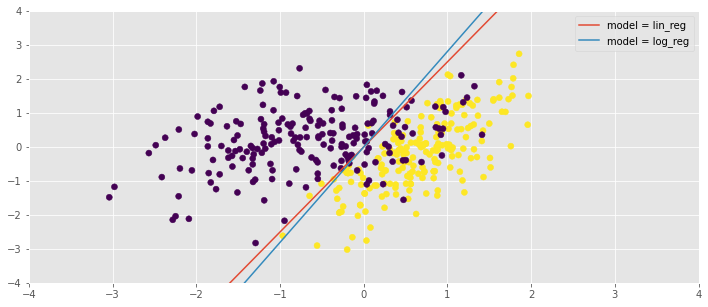

In [12]:
ModelOne = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=1)
ModelOne.fit(X, y)
plot_decision_boundary(ModelOne)

ModelTwo = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=1)
ModelTwo.fit(X, y)
plot_decision_boundary(ModelTwo)

plt.scatter(X[:, 0], X[:, 1], c=y)

Linear regression
The first and the second weghts are [ 0.16660521 -0.08101428]


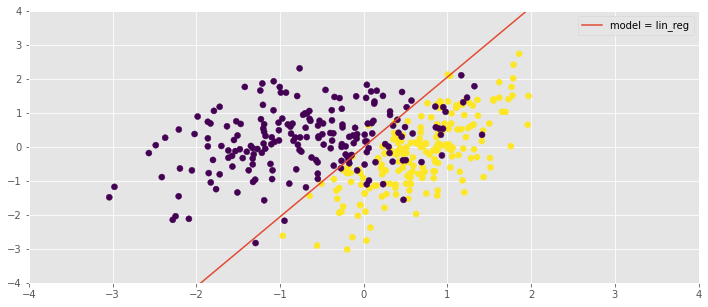

In [13]:
ModelOne = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=1)
ModelOne.fit(X, y)
print('Linear regression')
plot_decision_boundary(ModelOne)
print("The first and the second weghts are", ModelOne.weights)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()

Logistic regression
The first and the second weghts are [ 0.15133633 -0.04963257]


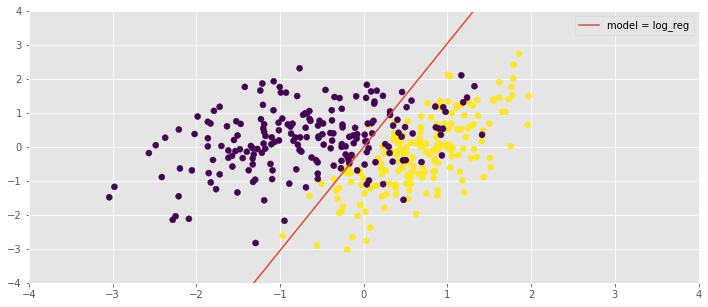

In [14]:
ModelTwo = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=1)
ModelTwo.fit(X, y)
print('Logistic regression')
plot_decision_boundary(ModelTwo)
print("The first and the second weghts are", ModelTwo.weights)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [15]:
from sklearn.datasets import make_classification

In [16]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [17]:
AlphaArray = [0.0005,0.001,0.01,0.05,0.1]

In [18]:
def alpha_test(model, N, X, y):
    for alphaid in AlphaArray:
        Model = MySGDClassifier(batch_generator, alpha=alphaid, max_epoch=50,
                                model_type=model, batch_size=100)
        Model.fit(X, y)
        loss = np.asarray(Model.errors_log['loss'])
        epoch_batches = loss.shape[0] // N
        x = [loss[i:i+N, :].mean() for i in range(epoch_batches)]
        x = np.asarray(x)
        plt.plot(x, label='alpha={}'.format(alphaid))
    plt.legend()

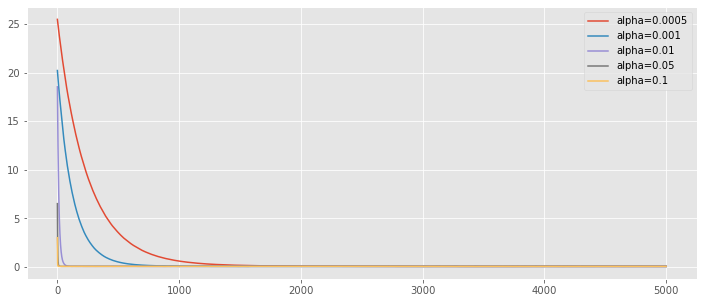

In [19]:
alpha_test(model="lin_reg", N=10, X=X, y=y)

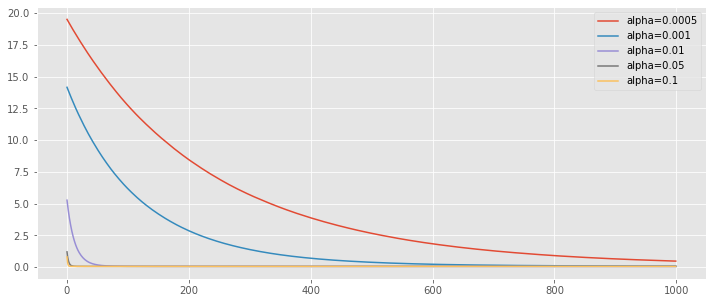

In [20]:
alpha_test(model="lin_reg", N=50, X=X, y=y)

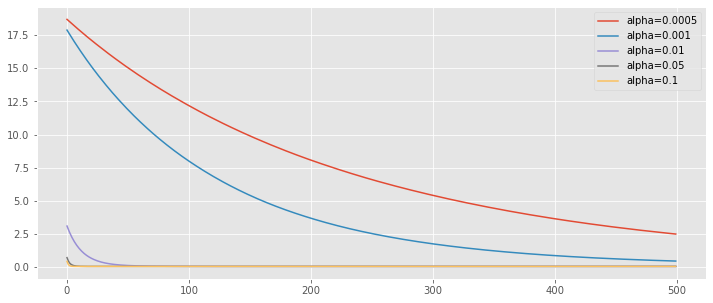

In [21]:
alpha_test(model="lin_reg", N=100, X=X, y=y)

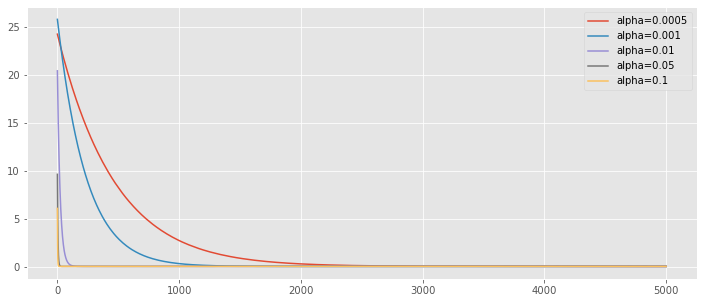

In [22]:
alpha_test(model="log_reg", N=10, X=X, y=y)

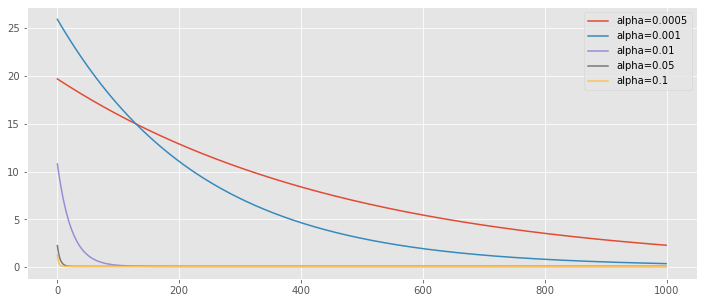

In [23]:
alpha_test(model="log_reg", N=50, X=X, y=y)

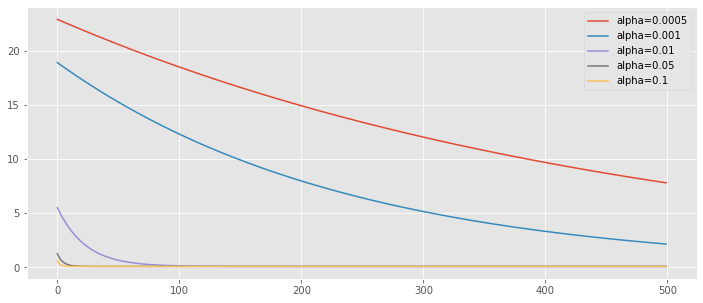

In [24]:
alpha_test(model="log_reg", N=100, X=X, y=y)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше мы выберем альфа, тем быстрее у нас будет сходимость. Однако, например,  судя полученным графикам,я бы лучше выбирал альфа  = 0.001. Сходиться мы будем медленнее,чем в случае какого-нибудь альфа = 0.05 или 0.01, но побыстрее,чем в случае альфа = 0.0005. Зато сходимость будет плавной, что будет более верно

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [25]:
np.logspace(3, -3, 10)

array([1.00000000e+03, 2.15443469e+02, 4.64158883e+01, 1.00000000e+01,
       2.15443469e+00, 4.64158883e-01, 1.00000000e-01, 2.15443469e-02,
       4.64158883e-03, 1.00000000e-03])

<ipython-input-8-aab37ee91bdb>:42: RuntimeWarning: overflow encountered in double_scalars
  regulator = np.sum(self.weights ** 2)/self.C
<ipython-input-8-aab37ee91bdb>:45: RuntimeWarning: overflow encountered in square
  loss = ((y_batch - np.dot(X_batch, self.weights)) ** 2)/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:42: RuntimeWarning: overflow encountered in square
  regulator = np.sum(self.weights ** 2)/self.C
<ipython-input-8-aab37ee91bdb>:64: RuntimeWarning: overflow encountered in multiply
  loss_grad = 2*np.dot(np.dot(X_batch, self.weights) - y_batch, X_batch)/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:61: RuntimeWarning: overflow encountered in true_divide
  regulator = 2*self.weights/self.C
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-aab37ee91bdb>:64: RuntimeWarning: invalid value encountered in add
  loss_grad = 2*

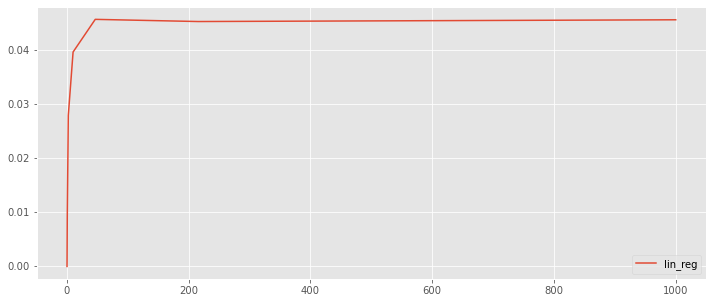

In [26]:
MeanWeights = []
Cvar = np.logspace(3, -3, 10)
for Const in Cvar:
    Model = MySGDClassifier(batch_generator, alpha=0.01, C=Const, max_epoch=50,
                            model_type="lin_reg", batch_size=100)
    Model.fit(X, y)
    MeanWeights.append(Model.weights.mean())
MeanWeights = np.asarray(MeanWeights)
plt.plot(Cvar, MeanWeights, label='lin_reg')
plt.legend()

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-8-aab37ee91bdb>:42: RuntimeWarning: overflow encountered in double_scalars
  regulator = np.sum(self.weights ** 2)/self.C
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-aab37ee91bdb>:42: RuntimeWarning: overflow encountered in square
  regulator = np.sum(self.weights ** 2)/self.C
<ipython-input-8-aab37ee91bdb>:61: RuntimeWarning: overflow encountered in true_divide
  regulato

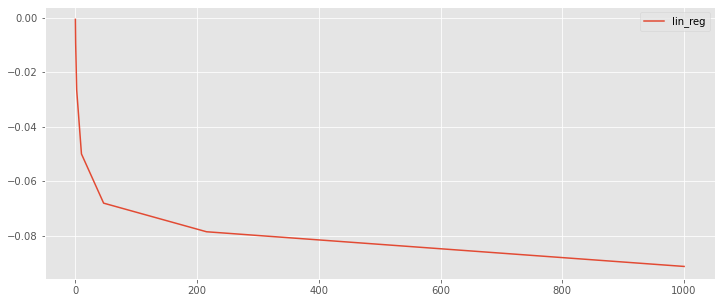

In [27]:
MeanWeights = []
Cvar = np.logspace(3, -3, 10)
for Const in Cvar:
    Model = MySGDClassifier(batch_generator, alpha=0.01, C=Const, max_epoch=50,
                            model_type="log_reg", batch_size=100)
    Model.fit(X, y)
    MeanWeights.append(Model.weights.mean())
MeanWeights = np.asarray(MeanWeights)
plt.plot(Cvar, MeanWeights, label='lin_reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [28]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='UTF-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [29]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [30]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [31]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
import time

In [34]:
batches = [10,25,50,100,150,300,500,750,800,850,900,1000]

In [35]:
for batch in batches:
    clf = MySGDClassifier(batch_generator, C=1, batch_size=batch,
                          model_type='lin_reg', max_epoch=50, alpha=0.001)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    time_dif = end - start
    print(batch, time_dif)

10 2.499542236328125
25 0.9443185329437256
50 0.5188388824462891
100 0.27353405952453613
150 0.20805954933166504
300 0.21161174774169922
500 0.1516273021697998
750 0.13847613334655762
800 0.12398386001586914
850 0.1238248348236084
900 0.08929777145385742
1000 0.10157251358032227


In [36]:
for batch in batches:
    clf = MySGDClassifier(batch_generator, C=1, batch_size=batch,
                          model_type='log_reg', max_epoch=50, alpha=0.001)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    time_dif = end - start
    print(batch, time_dif)

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001


10 3.198245048522949
25 1.4933712482452393
50 0.7056329250335693
100 0.415463924407959
150 0.3065807819366455
300 0.2689681053161621
500 0.1745295524597168
750 0.17462825775146484
800 0.16308999061584473
850 0.16261625289916992
900 0.16346216201782227
1000 0.18740534782409668


Возьмём число батчей  = 800

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подбираем параметры на валидации. Сделаем валидацию, разделив выборку на 10 кусков.

In [37]:
res = []
C_valid = [1, 10, 50, 100, 150, 250]
alpha_valid = [0.1, 0.01, 0.001, 0.0005]
max_epoch_valid = [5, 10, 15, 25]
model_type_valid = ["lin_reg", "log_reg"]
folds = KFold(n_splits=10)
score = 0

for c in C_valid:
    for alph in alpha_valid:
        for epoch in max_epoch_valid:
            for mod_type in model_type_valid:
                for train_sample, test_sample in folds.split(X_train, y_train):
                    Model = MySGDClassifier(batch_generator, C=c,
                                            batch_size=800, model_type=mod_type, max_epoch=epoch, alpha=alph)
                    Model.fit(X_train[train_sample], y_train[train_sample])
                    Prediction = Model.predict(X_train[test_sample])
                    score += roc_auc_score(y_train[test_sample], Prediction)
                score = score/10
                res.append([score, c, alph, epoch, mod_type])
                score = 0

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multipl

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in lo

<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001
<ipython-input-8-aab37ee91bdb>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1)*(y_batch * np.log(sigma) + (1-y_batch) * np.log(1-sigma))/N + regulator + 0.00001


In [38]:
res

[[0.7878928817597932, 1, 0.1, 5, 'lin_reg'],
 [0.7189411142425813, 1, 0.1, 5, 'log_reg'],
 [0.7879384637936433, 1, 0.1, 10, 'lin_reg'],
 [0.7196448823114905, 1, 0.1, 10, 'log_reg'],
 [0.7881298362140905, 1, 0.1, 15, 'lin_reg'],
 [0.7190825884367542, 1, 0.1, 15, 'log_reg'],
 [0.7878260722593073, 1, 0.1, 25, 'lin_reg'],
 [0.7189191413409091, 1, 0.1, 25, 'log_reg'],
 [0.7817654127190348, 1, 0.01, 5, 'lin_reg'],
 [0.7172328604113644, 1, 0.01, 5, 'log_reg'],
 [0.7875672373130987, 1, 0.01, 10, 'lin_reg'],
 [0.718951680122361, 1, 0.01, 10, 'log_reg'],
 [0.7882694662998232, 1, 0.01, 15, 'lin_reg'],
 [0.7184807804005909, 1, 0.01, 15, 'log_reg'],
 [0.7882192721315611, 1, 0.01, 25, 'lin_reg'],
 [0.7189200126997113, 1, 0.01, 25, 'log_reg'],
 [0.7881049105886018, 1, 0.001, 5, 'lin_reg'],
 [0.718218617738896, 1, 0.001, 5, 'log_reg'],
 [0.7671456096814432, 1, 0.001, 10, 'lin_reg'],
 [0.718883258155883, 1, 0.001, 10, 'log_reg'],
 [0.7502506358064943, 1, 0.001, 15, 'lin_reg'],
 [0.718759854670863, 1, 0

In [39]:
score_list = sorted(res, key=lambda i: i[0], reverse=True)
score_list

[[0.7903198724311131, 100, 0.001, 5, 'lin_reg'],
 [0.788668782188424, 150, 0.0005, 5, 'lin_reg'],
 [0.7886087300317364, 100, 0.1, 10, 'lin_reg'],
 [0.7885598899540553, 100, 0.0005, 10, 'lin_reg'],
 [0.7884953617364999, 50, 0.1, 25, 'lin_reg'],
 [0.7884198068723314, 1, 0.0005, 5, 'lin_reg'],
 [0.7884107558267572, 250, 0.0005, 5, 'lin_reg'],
 [0.7882694662998232, 1, 0.01, 15, 'lin_reg'],
 [0.7882192721315611, 1, 0.01, 25, 'lin_reg'],
 [0.7882157243995023, 10, 0.1, 25, 'lin_reg'],
 [0.7882053349632693, 10, 0.0005, 10, 'lin_reg'],
 [0.7882026024412372, 250, 0.1, 15, 'lin_reg'],
 [0.7882017168464394, 250, 0.1, 10, 'lin_reg'],
 [0.788174968746106, 10, 0.0005, 5, 'lin_reg'],
 [0.7881493706083407, 150, 0.1, 10, 'lin_reg'],
 [0.7881298362140905, 1, 0.1, 15, 'lin_reg'],
 [0.7881049105886018, 1, 0.001, 5, 'lin_reg'],
 [0.7880788151072956, 100, 0.1, 15, 'lin_reg'],
 [0.7880457098865001, 50, 0.0005, 5, 'lin_reg'],
 [0.7880439459920691, 10, 0.1, 10, 'lin_reg'],
 [0.7880398541861975, 50, 0.1, 10, 'li

In [40]:
The_best = score_list[0]
The_best

[0.7903198724311131, 100, 0.001, 5, 'lin_reg']

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [49]:
score = 0
thresholds = []
folds = KFold(n_splits=10)
for threshold in np.linspace(0.40, 0.60, num=50):
    for train_sample, test_sample in folds.split(X_train, y_train):
        Model = MySGDClassifier(batch_generator, C=100, batch_size=800,
                                model_type='lin_reg', max_epoch=5, alpha=0.001, th=threshold)
        Model.fit(X_train[train_sample], y_train[train_sample])
        Prediction = Model.predict(X_train[test_sample])
        score += roc_auc_score(y_train[test_sample], Prediction)
        #score += f1_score(y_train[test_sample], Prediction)
    score = score/10
    thresholds.append([score, threshold])
    score = 0

In [50]:
thresholds

[[0.7878285646265057, 0.4],
 [0.7876516975256432, 0.40408163265306124],
 [0.7889438084322709, 0.40816326530612246],
 [0.7881114874557437, 0.4122448979591837],
 [0.7882614859134007, 0.4163265306122449],
 [0.7876528299022081, 0.42040816326530617],
 [0.7900993877168513, 0.4244897959183674],
 [0.7896606996781314, 0.4285714285714286],
 [0.7875944894867017, 0.4326530612244898],
 [0.7871200361191135, 0.43673469387755104],
 [0.789563430149572, 0.44081632653061226],
 [0.7882067649715956, 0.4448979591836735],
 [0.7892451542846534, 0.4489795918367347],
 [0.7877823013462604, 0.4530612244897959],
 [0.7886552629222321, 0.4571428571428572],
 [0.7888940150280584, 0.4612244897959184],
 [0.7841049883925612, 0.4653061224489796],
 [0.7863413570278539, 0.46938775510204084],
 [0.7873421783150296, 0.47346938775510206],
 [0.7854792564196657, 0.4775510204081633],
 [0.7884890846220901, 0.4816326530612245],
 [0.7876528231371263, 0.4857142857142857],
 [0.7899891274277382, 0.4897959183673469],
 [0.7883289577565634

In [51]:
top_thresholds = sorted(thresholds, key = lambda i: i[0], reverse = True)
top_thresholds 

[[0.7914659095063842, 0.5061224489795918],
 [0.790536895652278, 0.5551020408163265],
 [0.7903543931692429, 0.5714285714285714],
 [0.7900993877168513, 0.4244897959183674],
 [0.7899891274277382, 0.4897959183673469],
 [0.7897845360525204, 0.5387755102040817],
 [0.7896820689454305, 0.5591836734693878],
 [0.7896606996781314, 0.4285714285714286],
 [0.789563430149572, 0.44081632653061226],
 [0.7894956403406557, 0.5020408163265306],
 [0.7893506579721926, 0.5142857142857142],
 [0.7893197760643524, 0.5836734693877551],
 [0.7892451542846534, 0.4489795918367347],
 [0.7891989252455167, 0.5265306122448979],
 [0.7891565704608697, 0.5959183673469388],
 [0.7889438084322709, 0.40816326530612246],
 [0.7888940150280584, 0.4612244897959184],
 [0.7886717377643532, 0.5428571428571429],
 [0.7886552629222321, 0.4571428571428572],
 [0.7885460391486792, 0.6],
 [0.7884890846220901, 0.4816326530612245],
 [0.7884620295912143, 0.5224489795918368],
 [0.7883289577565634, 0.4938775510204082],
 [0.7882614859134007, 0.41

In [52]:
The_best_th = top_thresholds[0]
The_best_th 

[0.7914659095063842, 0.5061224489795918]

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [53]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [54]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)

In [55]:
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [56]:
X_test = scaler.fit_transform(X_test)

In [57]:
FinalModel = MySGDClassifier(batch_generator, C=100, batch_size=800,
                                model_type='lin_reg', max_epoch=5, alpha=0.0005, th=0.5061224489795918)
FinalModel.fit(X_train, y_train)
Prediction = FinalModel.predict(X_test)

In [58]:
for i in range(Prediction.shape[0]):
    if Prediction[i] > 0.5061224489795918 :
        Prediction[i] = 1
    else:
        Prediction[i] = 0
Prediction = Prediction.astype('int')

In [59]:
test_data["target"] = pd.Series(Prediction)
with open("predict.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

Ник на Kaggle  - F1reBringer

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Курс интересный и видно, что имеет реальное прикладное применение, в отличие от многих курсов в том же университете,
где не понятно, зачем вообще эти курсы нужны.
Вообще, это действительно доставляет удовольствие разбираться во всех этих вещах. В этой домашке особенно было интересно разобраться, как работает настройка гиперпараметров и кросс-валидация, увидеть, что при разных значениях параметров можно получить разный score.
Конечно, в силу того, что лично я только начинаю изучение ML, какого-то сильно крутого скора в соревновании пока что не удалось добиться,и удалось оказаться только в середине таблицы, но всё ещё впереди.